# Ciência dos Dados - PROJETO 1

## Abel Cavalcante e Theo Barbara

## Projeto de Análise e Filtragem de Dados

## Introdução

Esse projeto tem como objetivo principal analisar o perfil geral da População Economicamete Ativa. Pensando ainda nesse perfil, queremos responder a pergunta: Qual é o perfil educacional da População Economicamente Ativa brasileira?

## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('PES2015.csv')
data.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2015,11,15,1,1,2,27,2,1992,...,1.0,800.0,4.0,5,1.0,2.0,2.0,1.0,800.0,20161117
1,1,2015,11,15,3,1,4,4,5,1992,...,1.0,1150.0,4.0,5,1.0,2.0,2.0,1.0,1150.0,20161117
2,2,2015,11,15,4,1,4,4,1,1980,...,6.0,793.0,4.0,6,1.0,2.0,2.0,1.0,793.0,20161117
3,3,2015,11,15,4,2,2,5,6,1981,...,6.0,793.0,4.0,7,1.0,2.0,2.0,1.0,793.0,20161117
4,4,2015,11,15,4,3,4,8,4,2004,...,6.0,793.0,4.0,2,2.0,NaN,NaN,2.0,793.0,20161117


As variáveis utilizadas para o cumprimento do nosso objetivo serão:

- UF (Unidade Federativa);
- V8005 (Idade do morador);
- V0601 (Saber ler e escrever);
- V6007 (Curso mais elevado que já frequentou);
- V4713 (Condição de atividade no trabalho principal do período de referência de 365 dias para pessoas de 10 anos ou mais de idade).

In [3]:
data_filtro = data[['UF', "V8005", "V0601", "V6007", "V4713"]][data["V8005"] > 10][data["V8005"] < 65]
data_filtro.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,UF,V8005,V0601,V6007,V4713
0,11,23,1,5.0,1.0
1,11,23,1,5.0,1.0
2,11,35,1,NaN,1.0
3,11,34,1,8.0,1.0
4,11,11,1,NaN,2.0


Antes de começarmos a programar, vamos redefinir o nome de algumas variáveis:

In [4]:
data_filtro.columns = ['UF', 'MORADOR_IDADE', 'SABER_LER', 'MAIOR_CURSO', 'PEA']
data_filtro.head()

,UF,MORADOR_IDADE,SABER_LER,MAIOR_CURSO,PEA
0,11,23,1,5.0,1.0
1,11,23,1,5.0,1.0
2,11,35,1,NaN,1.0
3,11,34,1,8.0,1.0
4,11,11,1,NaN,2.0


Temos, assim, que a variável "População Economicamente Ativa" pode ser definida como sendo a variável "V4713". Assim,  pretendemos usar essa variável como base de estudo.

In [5]:
data_filtro[['PEA']].head()

,PEA
0,1.0
1,1.0
2,1.0
3,1.0
4,2.0


Podemos também ver que essa variável possui duas opções: "1.0", que significa que a pessoa é Economicamente ativa e "2.0", que significa que a pessoa é Economicamente inativa.

In [6]:
data_filtro.PEA.value_counts()

1.0    186168
2.0     83402
Name: PEA, dtype: int64

Como queremos medir o perfil das pessoas economicamente ativas, ignoraremos a parcela que se encontra em "2.0"

In [7]:
ativos = data_filtro[data_filtro.PEA == 1]
ativos.PEA.value_counts()

1.0    186168
Name: PEA, dtype: int64

Também filtraremos os dados que estão como "NaN":

In [8]:
ativos = ativos.fillna(0)
ativos.head()

,UF,MORADOR_IDADE,SABER_LER,MAIOR_CURSO,PEA
0,11,23,1,5.0,1.0
1,11,23,1,5.0,1.0
2,11,35,1,0.0,1.0
3,11,34,1,8.0,1.0
7,11,18,1,5.0,1.0


Assim, temos que o dataframe 'ativos' contém apenas as pessoas economicamente ativas. Com isso, podemos trabalhar com as variáveis:

In [9]:
# Vamos separar a variável "UF" em regiões, para melhor visualização:
if 'REGIAO' not in ativos:
    ativos.loc[(ativos.UF>10)&(ativos.UF<20), "REGIAO"] = "Norte"
    ativos.loc[(ativos.UF>20)&(ativos.UF<30), "REGIAO"] = "Nordeste"
    ativos.loc[(ativos.UF>30)&(ativos.UF<37), "REGIAO"] = "Sudeste"
    ativos.loc[(ativos.UF>40)&(ativos.UF<48), "REGIAO"] = "Sul"
    ativos.loc[(ativos.UF>49)&(ativos.UF<56), "REGIAO"] = "Centro-Oeste"
else:
    pass

# Definiremos quais variáveis são qualitativas:
ativos.UF = ativos.UF.astype('category')
ativos.SABER_LER = ativos.SABER_LER.astype('category')
ativos.MAIOR_CURSO = ativos.MAIOR_CURSO.astype('category')
ativos.PEA = ativos.PEA.astype('category')

ativos.UF.cat.categories = ("Rondônia", "Acre", "Amazonas", "Roraima", "Pará", "Amapá", "Tocantins", "Maranhão", "Piauí", "Ceará", "Rio Grande do Norte", "Paraíba", "Pernambuco", "Alagoas", "Sergipe", "Bahia", "Minas Gerais", "Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná", "Santa Catarina", "Rio Grande do Sul", "Mato Grosso do Sul", "Mato Grosso", "Goiás", "Distrito Federal")
ativos.SABER_LER.cat.categories = ("Sim", "Não")
ativos.MAIOR_CURSO.cat.categories = ("Não Aplicável", "Elementar (primário)", "Médio 1° Ciclo", "Médio 2° Ciclo", "Ensino Fundamental", "Ensino Médio", "Educação Joves e Adultos / Supletivo Ensino Fundamental", "Educação Joves e Adultos / Supletivo Ensino Médio" ,"Ensiono Superior", "Mestrado ou Doutorado", "Alfabetização de Jovens e Adultos", "Creche", "C.A.", "Maternal")
ativos.PEA.cat.categories = (["Economicamente ativas"])

ativos.head()

,UF,MORADOR_IDADE,SABER_LER,MAIOR_CURSO,PEA,REGIAO
0,Rondônia,23,Sim,Ensino Médio,Economicamente ativas,Norte
1,Rondônia,23,Sim,Ensino Médio,Economicamente ativas,Norte
2,Rondônia,35,Sim,Não Aplicável,Economicamente ativas,Norte
3,Rondônia,34,Sim,Ensiono Superior,Economicamente ativas,Norte
7,Rondônia,18,Sim,Ensino Médio,Economicamente ativas,Norte


## Análise de variáveis

Vamos explorar o perfil das pessoas Economicamente Ativas por região e por idade:

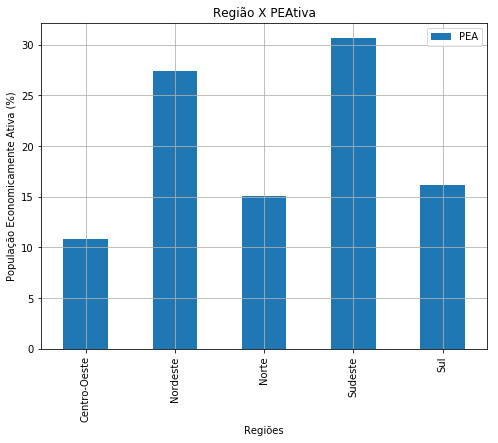

In [23]:
# Comparação região Vs População Economicamente Ativa
pea_reg = pd.crosstab(ativos.REGIAO, ativos.PEA, normalize = True) * 100
pea_reg.plot(kind='bar', figsize=(8, 6))
plt.ylabel("População Economicamente Ativa (%)")
plt.xlabel("Regiões")
plt.title("Região X PEAtiva")
plt.legend(["PEA"])
plt.grid(True);

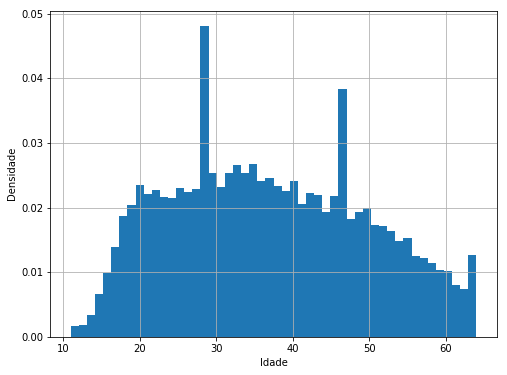

In [11]:
# Comparação idade Vs População Economicamente Ativa
ativos.MORADOR_IDADE.plot.hist(density=True, bins = 50, figsize=(8, 6))
plt.ylabel("Densidade")
plt.xlabel("Idade")
plt.title("Região X PEAtiva")
plt.grid(True);

Esses dados mostram alguams informações interessantes: Regiões como a Suldeste e Nordeste são a que apresentam o maior número de pessoas economicamente ativas, enquanto a capital do país, a região Centro-Oeste é a menos produtiva.

Além disso, é possível observar que, apesar de contra lei, há uma pequena taxa de pessoas com menos de 16 anos considerada como economicamente ativa.

### Educação

Agora, vamos explorar o perfil das População Economicamente Ativa pensando em sua educação. Para isso, vamos considerar três variáveis: saber ler e escrever, a rede de ensino frequentada e os anos de estudo dessas pessoas, além de compará-las entre sí:

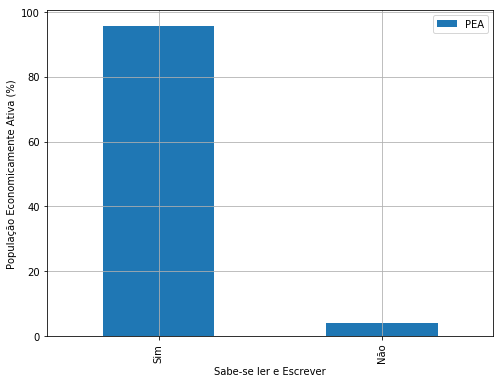

In [12]:
# População Economicamente Ativa vs Saber ler e escrever
pea_uf = pd.crosstab(ativos.SABER_LER, ativos.PEA, normalize = True) * 100
pea_uf.plot(kind='bar', figsize=(8, 6))
plt.ylabel(("População Economicamente Ativa (%)"))
plt.xlabel('Sabe-se ler e Escrever')
plt.title("Região X PEAtiva")
plt.legend(["PEA"])
plt.grid(True);

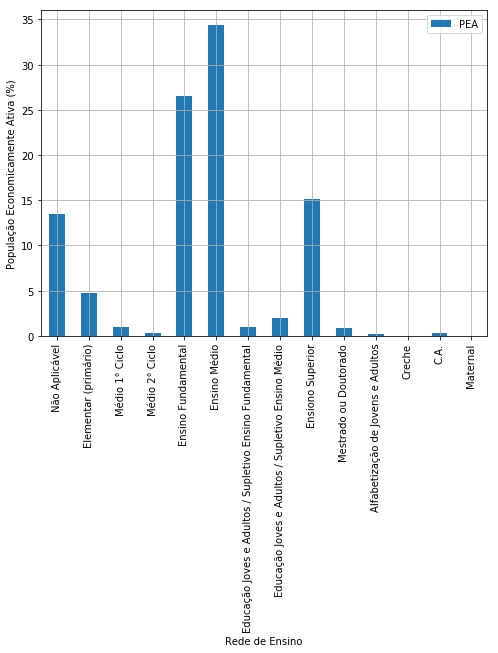

In [13]:
# População Economicamente Ativa vs Rede de ensino
pea_uf = pd.crosstab(ativos.MAIOR_CURSO, ativos.PEA, normalize = True) * 100
pea_uf.plot(kind='bar', figsize=(8, 6),)
plt.ylabel(("População Economicamente Ativa (%)"))
plt.xlabel('Rede de Ensino')
plt.title("Região X PEAtiva")
plt.legend(["PEA"])
plt.grid(True);

Podemos tirar mais algumas conclusões desses gráficos: A grande maioria da população economicamente ativa estudou apenas até o ensino médio. Além disso, o número de 'não aplicáveis' e o de 'não sabem ler e escrever' acabam distoando um do outro, o que quer dizer que, mesmo no parâmetro "não aplicável", uma parcela das pessoas naquele dado ainda apresentam algum estudo.

Apoós comparar individualmente, é possível compará-las entre sí:

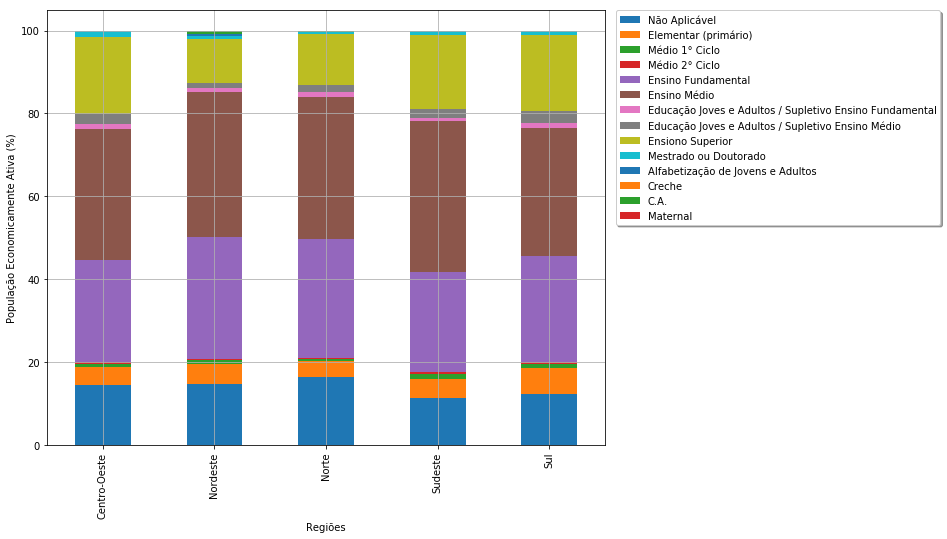

In [14]:
# Região Vs Maior curso prestado
regi_curso = pd.crosstab(ativos.REGIAO, ativos.MAIOR_CURSO, normalize='index') * 100
regi_curso.plot(kind='bar', stacked = True, label = 'right', figsize = (10, 8))
plt.ylabel(("População Economicamente Ativa (%)"))
plt.xlabel("Regiões")
plt.title("Região X PEAtiva")
plt.legend(loc='upper center', bbox_to_anchor=(1.31, 1.01), shadow=True, ncol=1)
plt.grid(True);

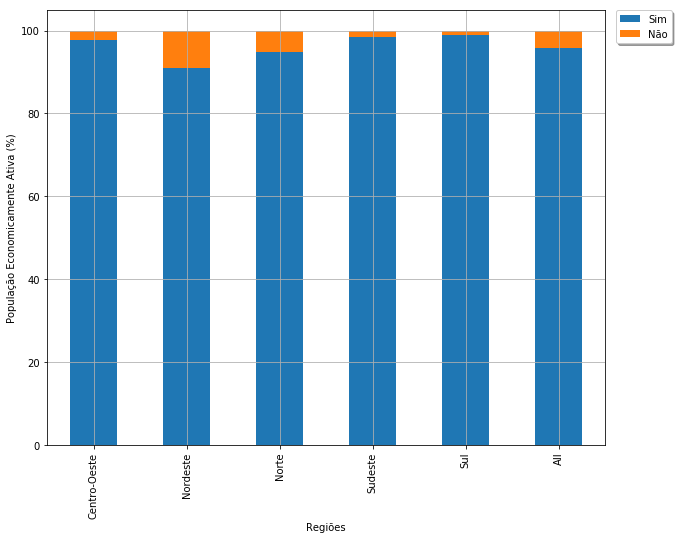

In [15]:
# Região Vs MSaber ler e escrever
regi_ler = pd.crosstab(ativos.REGIAO, ativos.SABER_LER, normalize='index', margins=True) * 100
regi_ler.plot(kind='bar', stacked = True, label = 'right', figsize = (10, 8))
plt.ylabel(("População Economicamente Ativa (%)"))
plt.xlabel("Regiões")
plt.title("Região X PEAtiva")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.01), shadow=True, ncol=1)
plt.grid(True);

Podemos inferir da análise desses gráficos que, em todas as regiões, os cursos mais elevados prestados foram o ENsino Fundamental e o Médio.

### Análise entre anos

Para fazer a análise entre os anos de 2015 e 2011, vamos usar a variável "MAIOR_CURSO", que diz o curso mais elevado prestado por aquela amostra populacional.

In [16]:
data11 = pd.read_csv('PES2011.csv')

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


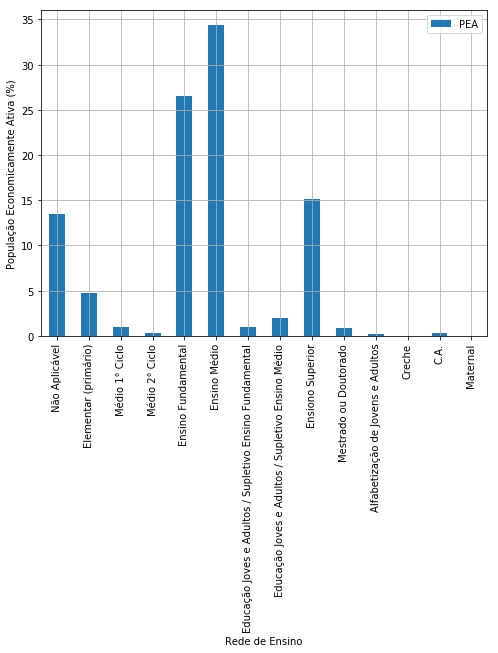

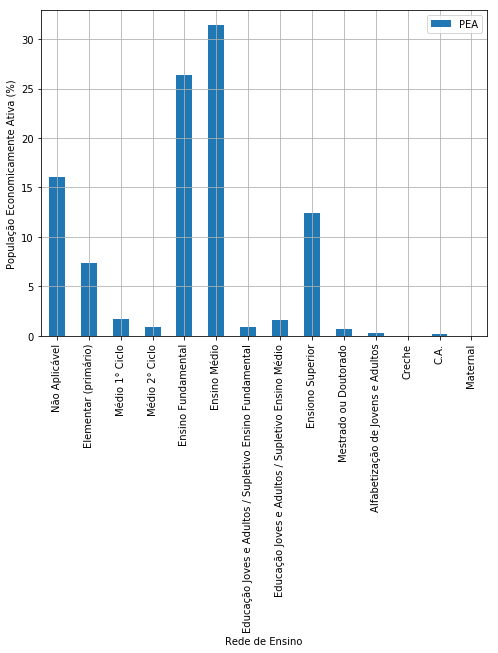

In [20]:
#2011 Vs 2015
data_filtro11 = data11[["V8005", "V6007", "V4713"]][data11["V8005"] > 10][data11["V8005"] < 65]
data_filtro11.columns = ['MORADOR_IDADE', 'MAIOR_CURSO', 'PEA']
ativos11 = data_filtro11[data_filtro11.PEA == 1]
ativos11 = ativos11.fillna(0)
ativos11.MAIOR_CURSO = ativos11.MAIOR_CURSO.astype('category')
ativos11.MAIOR_CURSO.cat.categories = ("Não Aplicável", "Elementar (primário)", "Médio 1° Ciclo", "Médio 2° Ciclo", "Ensino Fundamental", "Ensino Médio", "Educação Joves e Adultos / Supletivo Ensino Fundamental", "Educação Joves e Adultos / Supletivo Ensino Médio" ,"Ensiono Superior", "Mestrado ou Doutorado", "Alfabetização de Jovens e Adultos", "Creche", "C.A.", "Maternal")

pea_uf = pd.crosstab(ativos.MAIOR_CURSO, ativos.PEA, normalize = True) * 100
pea_uf.plot(kind='bar', figsize=(8, 6),)
plt.ylabel(("População Economicamente Ativa (%)"))
plt.xlabel('Rede de Ensino')
plt.title("Região X PEAtiva")
plt.legend(["PEA"])
plt.grid(True);

pea_uf11 = pd.crosstab(ativos11.MAIOR_CURSO, ativos11.PEA, normalize = True) * 100
pea_uf11.plot(kind='bar', figsize=(8, 6),)
plt.ylabel(("População Economicamente Ativa (%)"))
plt.xlabel('Rede de Ensino')
plt.title("Região X PEAtiva")
plt.legend(["PEA"])
plt.grid(True);

## Conclusão 

1 -  Maioria saiu do ensino médio - pq

2 - explicar pq a região centro-oeste é a menos produtiva

3 -  Mostrar porque a maioria é não aplicável (privada ou pública)